In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath('..')))

In [2]:
import pandas as pd
import numpy as np

In [3]:
from scripts import dataset as dt
from scripts import plot as pt
from scripts.plot import CityAccidentAnalyzer
from scripts import state_analyzer as state
from scripts import timezone_analysis as ta
from scripts import street_analysis as street
from scripts import severity_analysisis as severity
from scripts import road_condition_analysis as rca
from scripts import weather_analysis as wa
%matplotlib inline

### Load the dataset 

In [4]:
df = dt.dataset_ustrafic_accident()

In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


# Location Analysis

In [5]:
# check the no. of columns & rows
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 7,728,394 & Columns: 46


In [6]:
# Convert the Start_Time & End_Time Variable into Datetime Feature
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='ISO8601')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='ISO8601')

In [7]:
city_df = df['City'].value_counts().reset_index().rename(columns={'index':'City', 'count':'Cases'})

In [8]:
top_10_cities = pd.DataFrame(city_df.head(10))

In [10]:
pt.top_10cities(df)

1. Miami is the city with highest (2.42%) no. of road accidents in US (2016-2023).

2. Houston is the city with 2nd highest (2.19%) no. of road accidents in US (2016-2023).

3. Around 15.79% accident records of past 8 years are only from these 10 cities out of 13678 cities in US (as per the dataset).

In [11]:
weekly_cases, average_daily_cases = pt.calculate_kpis(city_df)

print(f"Yearly Cases: {weekly_cases}")
print(f"Average Daily Cases: {average_daily_cases}")

Yearly Cases: 23365
Average Daily Cases: 64


4. In past 8 years (2016-2023) yearly 23365 road accidents (average) happened in Miami.

5. In Miami averagely in every 12 hours 64 accidents occurred.

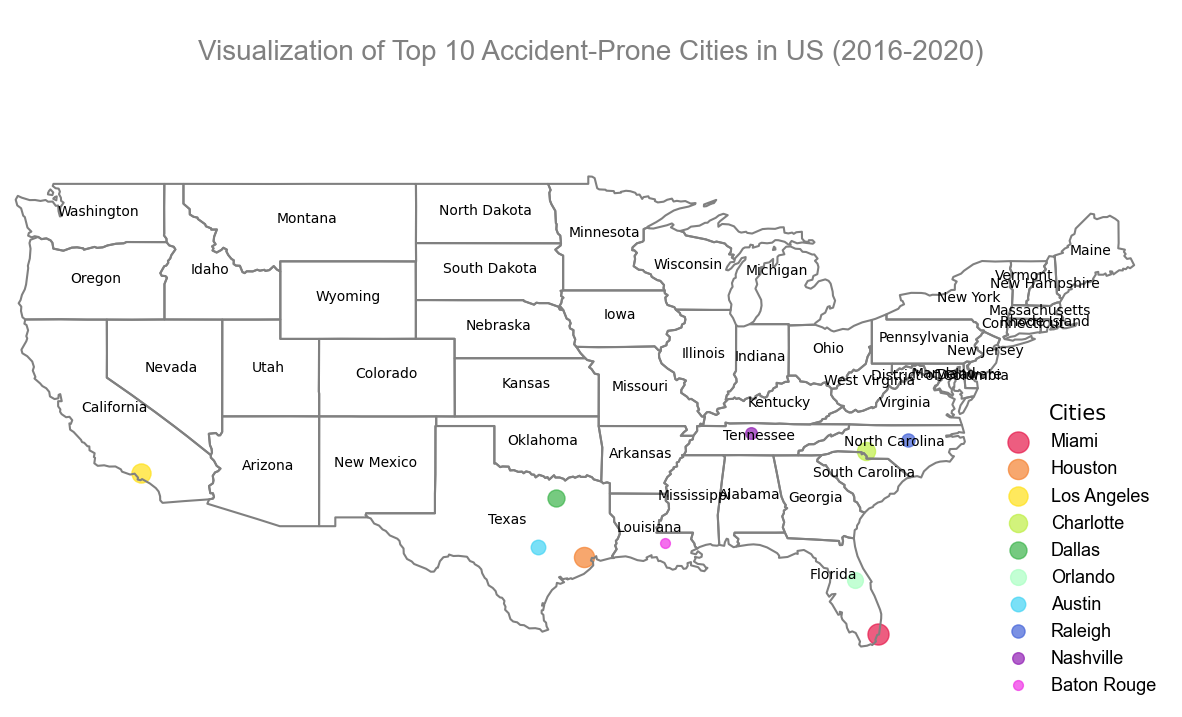

In [12]:
pt.top_10_accident_prone_city(city_df)

In [13]:
# pt.top_10_cities_df.to_csv('../data/prepocessed/top_to_cities_df_map.csv')

6. High-Accident States: Look for states like California, Texas, Florida, which often have higher accident rates due to population density and urban areas.

In [14]:
# Create an instance of the class
analyzer = CityAccidentAnalyzer(city_df)

# Print the results
analyzer.print_results()

In this Dataset, we have the records of total 13678 Cities.
7. 7.48% (1023 Cities) cities in US, have only 1 accident record in past 8 years.
8. Around 65.41% (8947 Cities) of all cities in US, have less than 100 total no. of road accidents.
9. 91.10% (12460 Cities) cities in US, have the road accident records (2016-2023), less than 1000.
10. There are 1215 Cities (8.88%) in US, which have more than 1000 total no. of road accidents in past 8 years.
11. 231 Cities (1.69%) in US, have more than 5000 road accident records.
12. Only 105 Cities (0.77%) in US, have more than 10000 road accident records.


# State Analysis 

In [9]:
# Create an instance of the class
analyzer = state.StateAnalyzer(df)
# Create the state dataframe
state_df = analyzer.create_state_df()
# Get the top 10 states
top_ten_states = analyzer.top_10_states(state_df)
# Get the least 10 states
least_ten_states = analyzer.least_10_states(state_df)

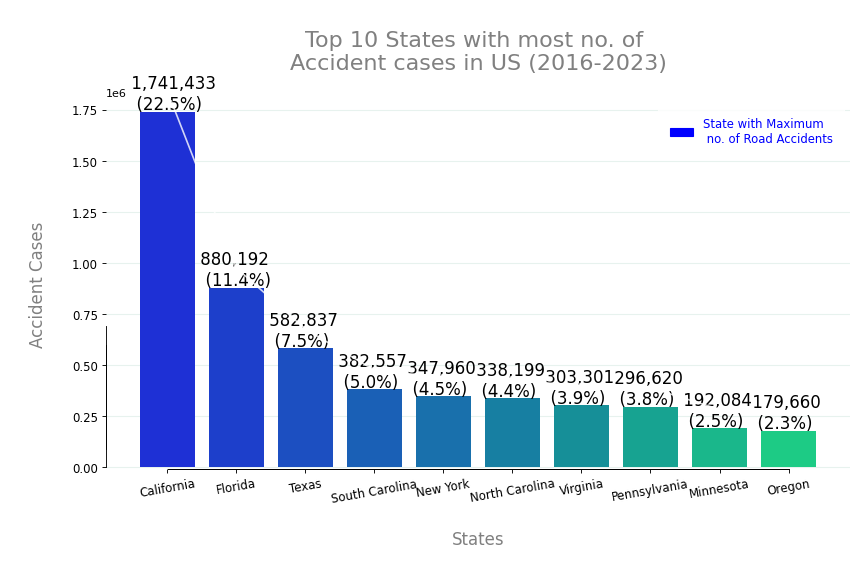

In [10]:
# Plot the top 10 states
analyzer.plot_top_states(df, top_ten_states)

13. In US, California is the state with highest no. of road accidents in past 8 years.

14. About 22.5% of the total accident records of past 8 years in US is only from California.

15. In past 8 years, averagely 596 accidents (daily) happened in California implies approximately 24 accidents per hour.

16. Florida is the 2nd highest (11.4% cases) state for no. road accidents in US.

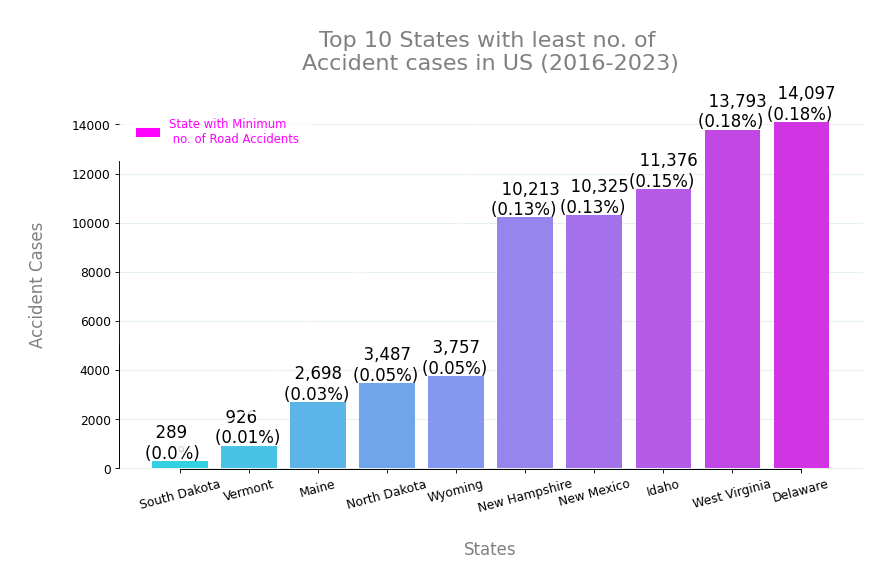

In [14]:
# Plot the least 10 states
analyzer.plot_least_states(df, least_ten_states)

17. South Dakota is the city with lowest no. of road accidents in past 8 years.

18. Only 289 accidents took place in South Dakota in past 8 years implies yearly 36 cases in average.

## Timezone Analysis

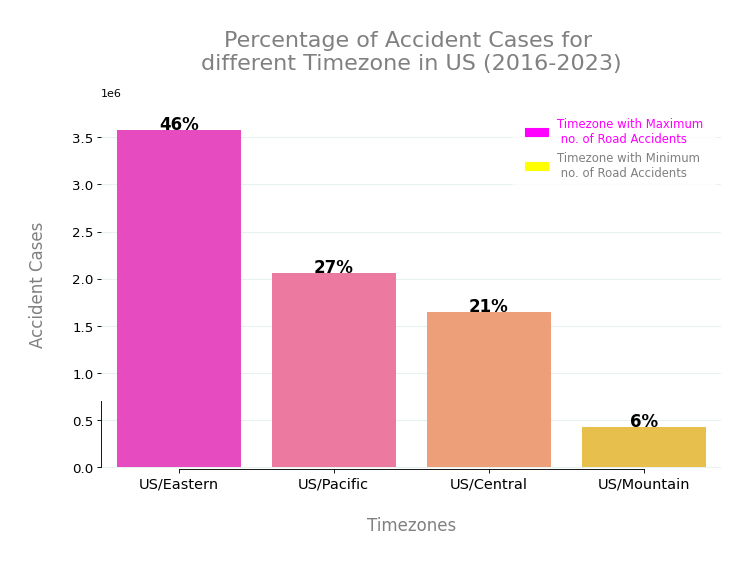

In [15]:
# Plot percentage of accident cases for differnt time zone
ta.timezone_analysis(df)

19. US/Eastern Timezone:

* Dominates with the highest percentage of accident cases at 46%.

* This could be attributed to a higher population density and more urban areas.

20. US/Pacific Timezone:

* Holds 27% of accident cases.

* California, a state in this timezone, is known for heavy traffic.

21. US/Central Timezone:

* Accounts for 21% of the accident cases.

* Significant urban centers like Chicago and Dallas likely contribute.

22. US/Mountain Timezone:

* Has the lowest percentage at 6%.

* This could be due to lower population density and fewer major cities.

# Street Analysis

In [5]:
# Create an instance of the StreetAccidentAnalyzer class
accident_analyzer = street.StreetAccidentAnalyzer(df)

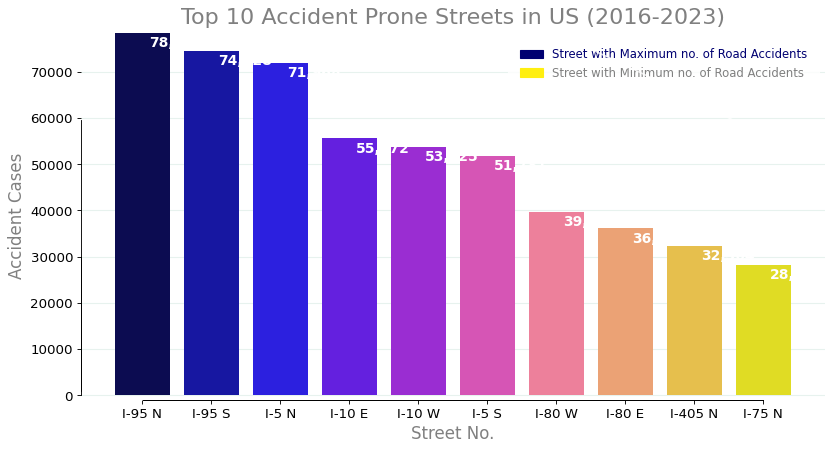

In [6]:
# Call the street_analysis method to display the bar plot
accident_analyzer.street_analysis(df)

23. High Risk Streets:

* I-95 N: The highest number of accidents at 78,430 cases.

* I-95 S: Follows closely with 74,528 cases.

* I-5 N: Has 71,968 accidents.

24. Visualization Clarity:

* The color coding helps distinguish each street's accident severity.

* Dark blue highlights the street with the highest accidents, and yellow the lowest, making it easy to identify at a glance.

25. Interstate Highways:

* The chart shows that interstate highways, especially those with multiple directions (N, S, E, W), are significant accident hotspots.

* This can be attributed to higher traffic volumes and speeds.


In [9]:
# Call the street_cases_percentage method to get the result as a string
result = accident_analyzer.street_cases_percentage(1, '=')
print(result)

129934 streets (38.64%) have 1 accident cases.


In [10]:
# Call the main method to run the demonstration
accident_analyzer.main()

In this Dataset, we have the records of total 336306 Streets.
129934 streets (38.64%) have 1 accident cases.
326421 streets (97.06%) have 100 accident cases.
335489 streets (99.76%) have 1000 accident cases.
817 streets (0.24%) have 1000 accident cases.
133 streets (0.04%) have 5000 accident cases.
68 streets (0.02%) have 10000 accident cases.


# Severity Analysis

Accident severity is represented on a scale from 1 to 4. A rating of 1 denotes minimal impact on traffic, leading to short delays, while a 4 signifies severe impact, causing long delays. Be aware that severity assessments from various sources might differ in their traffic impact, so segregate data by source when performing severity-based analyses.

In [124]:
severity.severity_analysis(df)

32. In 79% Cases of road accidents, the impact on the traffic was Moderate (Severity-2).

33. In 16.8% Cases of road accidents, the impact on the traffic was highly Severe (Severity-3).

# Road Condition Analysis

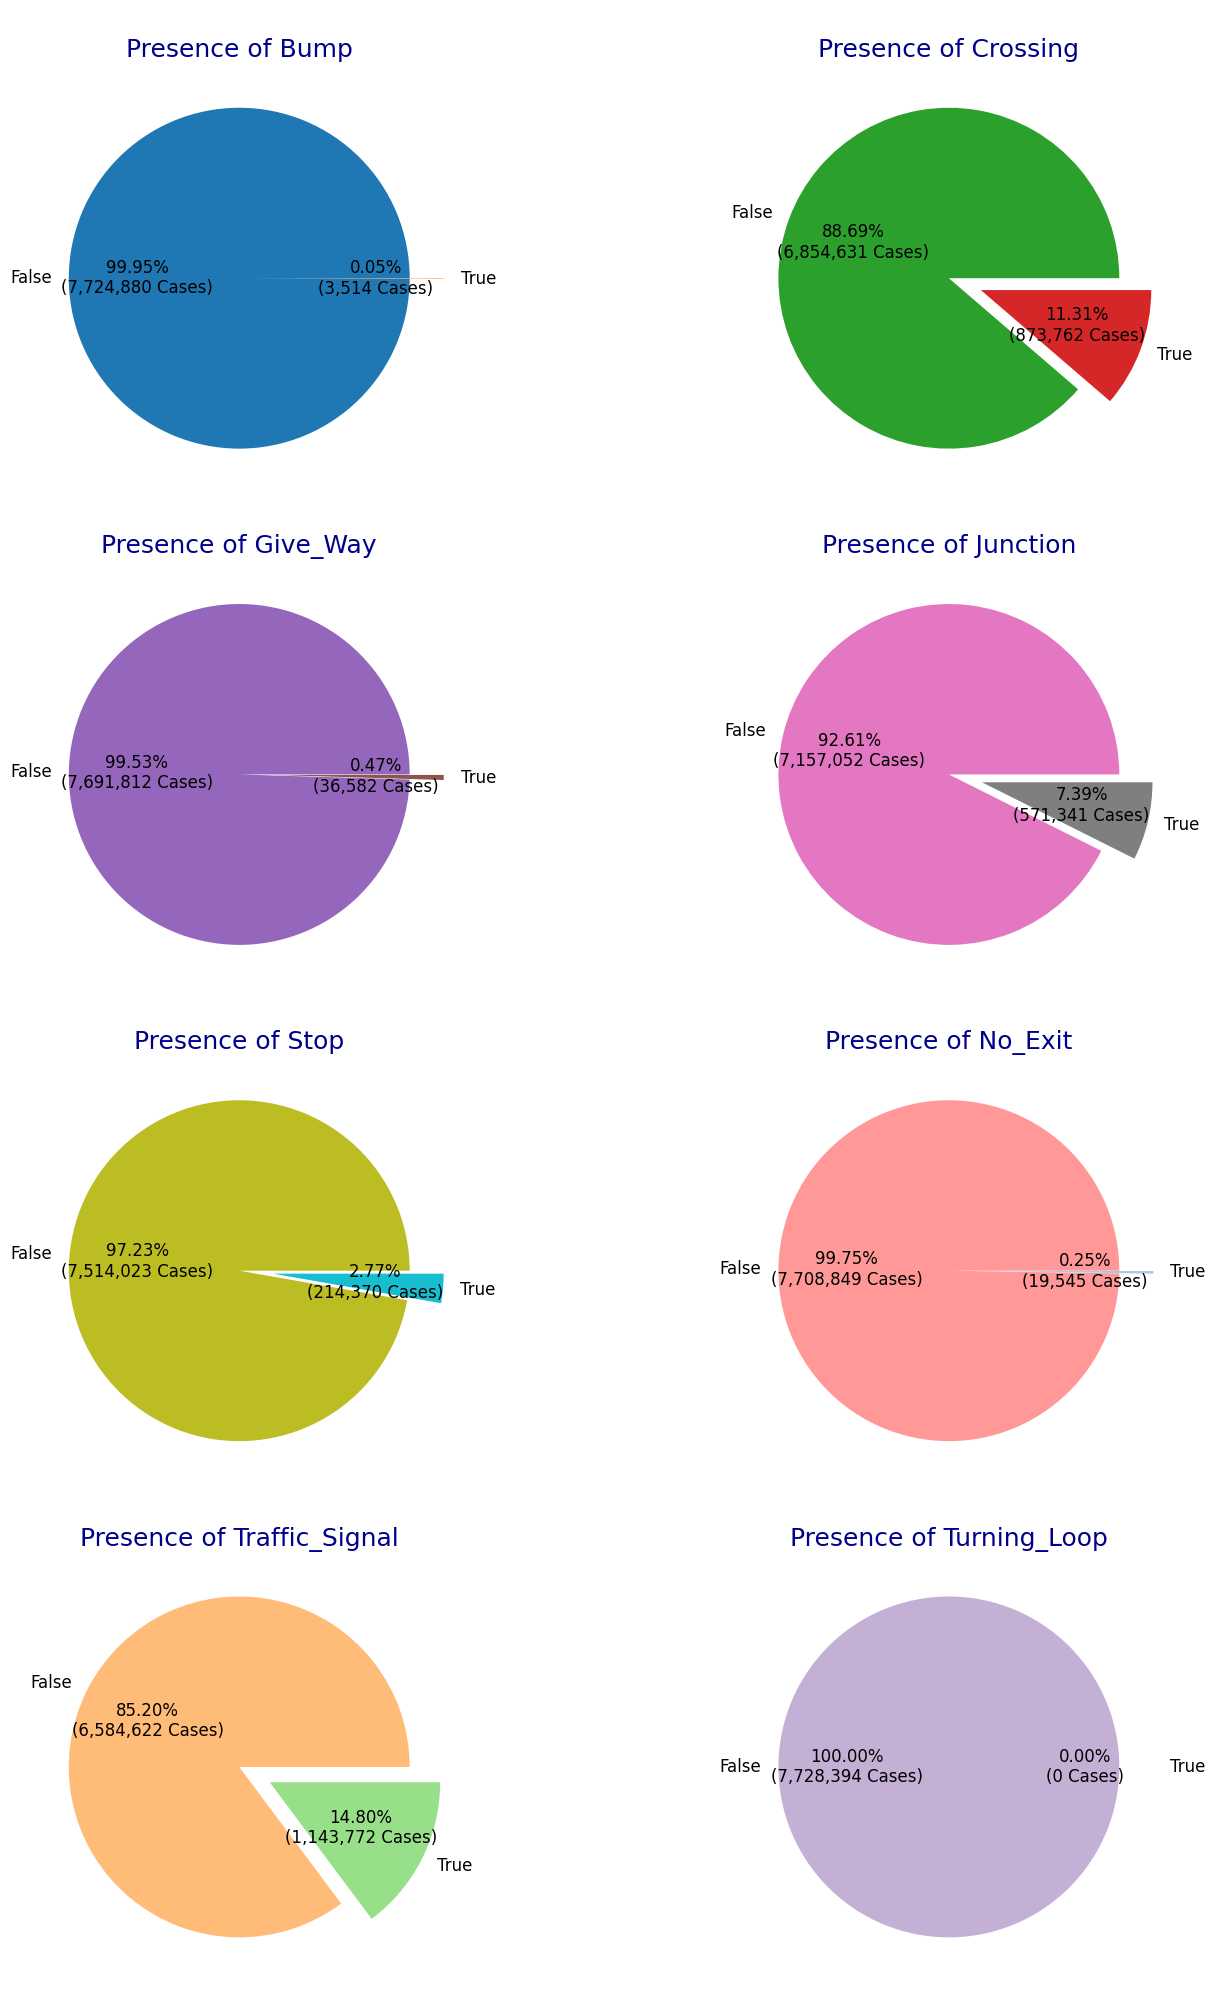

In [26]:

rca.road_condition_analysis(df)

34. Almost in every case (99.95%) Bumper was absent in the accident spot.

35. In 11.31% cases, road accidents happened near the crossing.

36. In 97.23% cases, there were no Stop near the accident area.

37. 7.39% road accident cases recorded near the junctions.

38. There are no accident cases recorded near the Turning Loop.

39. 14.80% road accident cases recorded near the traffic signal.

# Weather analysis

In [56]:
# Create an instance of the WeatherAnalysis class
weather_analysis = wa.WeatherAnalysis(df)

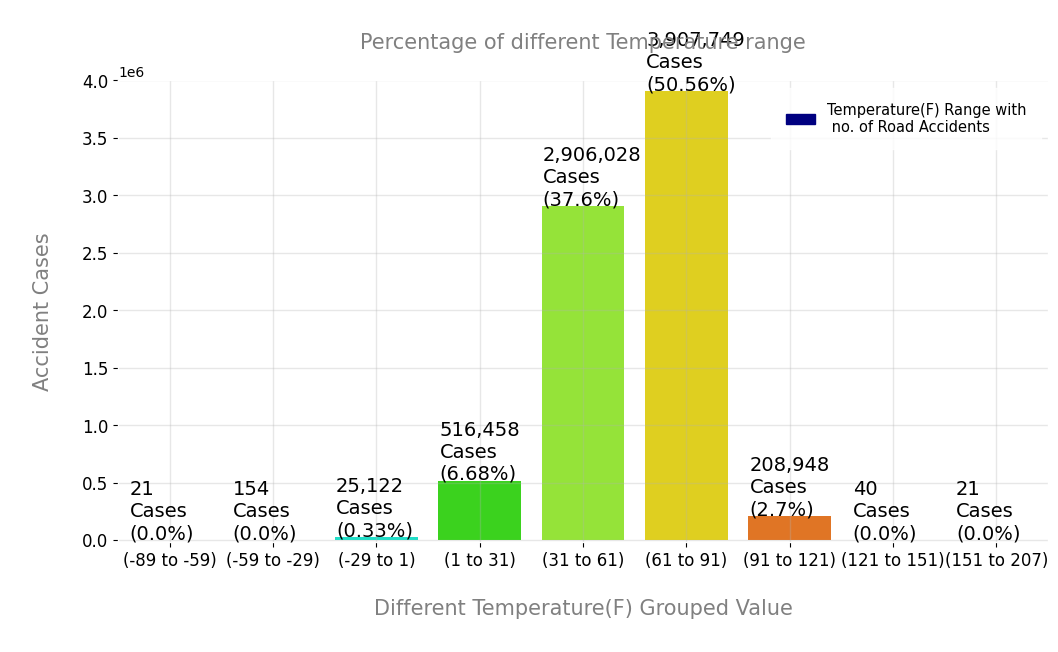

In [57]:
# Call the different methods to generate plots
weather_analysis.different_temperature_range(df)

40. Highest Accident Range:

 * 61 to 91 °F: This range sees the highest number of accidents, totaling 3,907,749 cases, which accounts for 50.56% of all accidents. This might be linked to higher traffic volumes in warmer and more comfortable driving conditions.

41. Significant Contributions:

* 31 to 61 °F: This range also has a significant number of accidents, with 2,906,028 cases (37.6%). Cooler but not freezing temperatures could still mean high traffic volumes.

42. Moderate Accident Rates:

* 1 to 31 °F: This range sees a moderate number of accidents, totaling 516,458 cases (6.68%). This might reflect increased risks from icy or wet conditions.

43. Least Accidents:

* Extremely high and low temperatures (i.e., <-29 °F, >121 °F) have the fewest accidents, possibly due to fewer vehicles on the road in such extreme conditions.

## Recommendations:
Targeted Safety Measures: Focus road safety campaigns on the 61 to 91 °F and 31 to 61 °F ranges to reduce accidents.

1. Seasonal Adjustments: Implement seasonal traffic management strategies to address the specific risks associated with each temperature range.

2. Further Research: Investigate additional factors, such as time of day and weather conditions, to understand the nuances of accident causation in these temperature ranges.

3. The data visualization beautifully emphasizes how weather conditions, particularly temperature, influence road safety. 

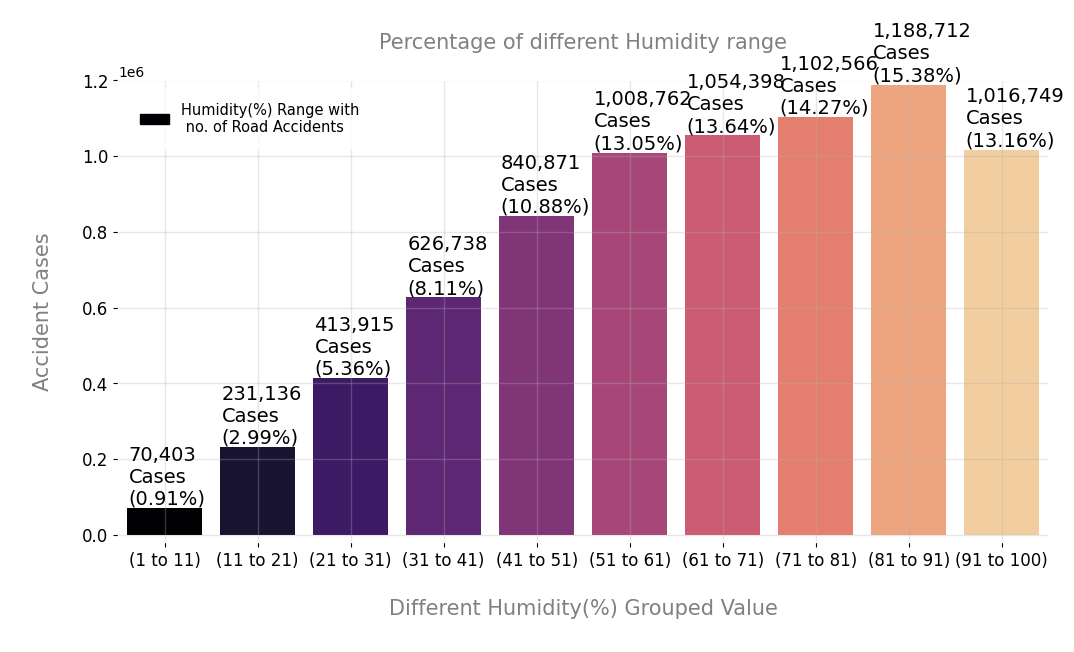

In [54]:
weather_analysis.humidity_intervals(df)

44. Humidity Impact:

* 81 to 91% Humidity: The highest number of accident cases are in this range, accounting for 15.38% of total accidents, which suggests that this range has the most significant impact on road safety.

45. Significant Ranges:

* 71 to 81% Humidity: Following closely, this range also sees a significant number of accidents, with 14.27% of the total.

* 61 to 71% Humidity: Another critical range, accounting for 13.64% of accidents.

46. Lower Impact Ranges:

* 1 to 11% Humidity: Least impact on accidents with 0.91%.

* 11 to 21% Humidity: Slightly higher but still low at 2.99%.

##### Recommendations:
1. Targeted Safety Campaigns: Focus on high-risk humidity ranges (61% to 91%) for road safety initiatives.

2. Seasonal Adjustments: Implement safety measures and driving guidelines based on weather forecasts predicting high humidity.

3. Further Analysis: Investigate the underlying causes in the most affected humidity ranges for better-targeted interventions.

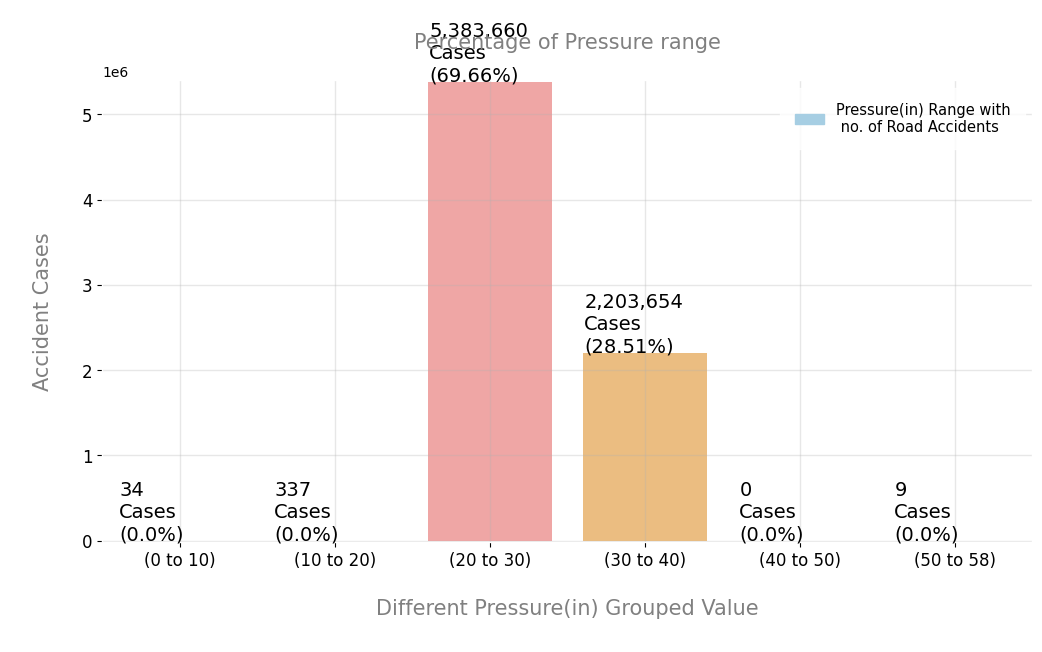

In [53]:
weather_analysis.pressure_range(df)

47. Dominant Pressure Range: The pressure range of (20 to 30) inches has the highest number of accident cases, accounting for 69.66% of the total. This indicates that a significant portion of accidents in the given region occur under these pressure conditions.
48. Comparatively Fewer Cases: The other pressure ranges have considerably fewer cases. The ranges of (0 to 10) and (10 to 20) inches have the lowest number of cases, each with 0.0% of the total.
49. Moderate Range: The pressure range of (30 to 40) inches falls in between, with 28.51% of the total cases.

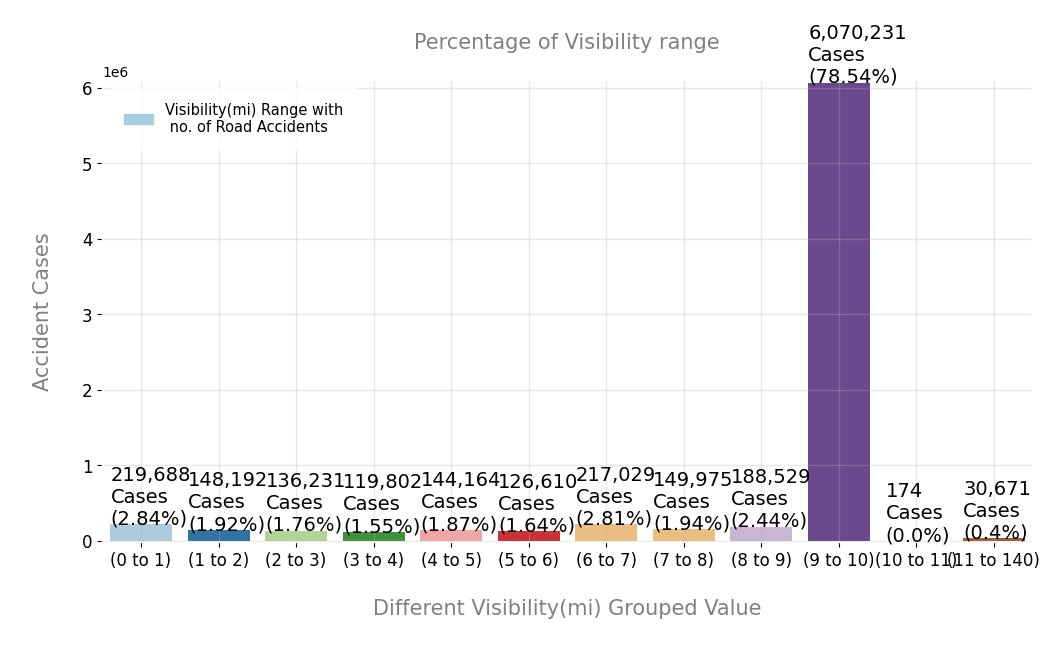

In [52]:
weather_analysis.visibility_range(df)

50. Dominant Visibility Range: The visibility range of (0 to 1) miles has the highest number of accident cases, accounting for 78.54% of the total. This indicates that a significant portion of accidents in the given region occur under conditions of low visibility.
51. Comparatively Fewer Cases: The other visibility ranges have considerably fewer cases. The ranges of (10 to 11) and (11 to 140) miles have the lowest number of cases, each with 0.0% and 0.4% of the total, respectively.
52. Moderate Ranges: The remaining visibility ranges have moderate numbers of cases, ranging from 1.55% to 2.84% of the total.

#### Possible Interpretations:

* Weather Conditions: The high prevalence of accidents in the (0 to 1) mile visibility range suggests that adverse weather conditions, such as fog, heavy rain, or snow, are significant contributors to accidents in the region.
* Poor Lighting: Inadequate lighting conditions, especially during nighttime or in poorly lit areas, could also contribute to accidents when visibility is low.
* Driver Behavior: Drivers might not adjust their speed or driving style appropriately in low visibility conditions, leading to accidents.

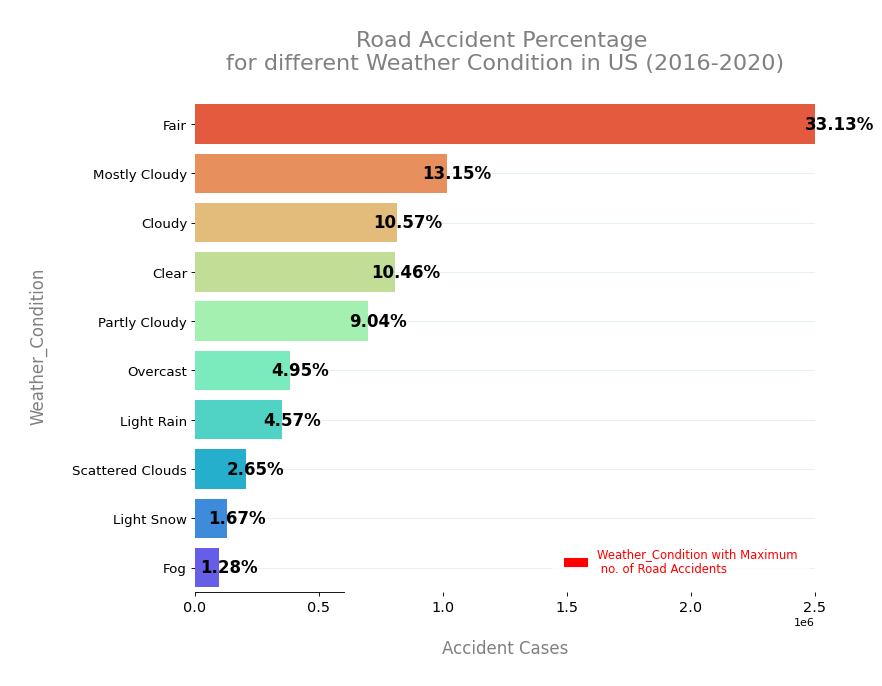

In [58]:
wa.weather_condition(df)

53. Dominant Weather Condition: Fair weather conditions account for the highest percentage of road accidents (33.13%), indicating that a significant portion of accidents occur in favorable weather conditions.
54. Cloudy Conditions: Cloudy conditions, including mostly cloudy, cloudy, partly cloudy, and overcast, contribute to a substantial number of accidents, collectively accounting for 43.31% of the total.
55. Adverse Weather: Adverse weather conditions such as light rain, scattered clouds, light snow, and fog have lower percentages of accidents, ranging from 1.28% to 4.57%.

#### Possible Interpretations:

* Increased Traffic: Fair weather conditions might lead to increased traffic volume, which could contribute to a higher number of accidents.
* Driver Behavior: Drivers might be more likely to take risks or engage in distracted driving in favorable weather conditions.
* Reduced Visibility: Cloudy conditions and adverse weather can reduce visibility, increasing the risk of accidents.
Road Conditions: Certain weather conditions might affect road surfaces, making them more slippery or hazardous.